In [1]:
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from collections import Counter
from glob import iglob
from wordcloud import WordCloud
import nltk
import os
import re

In [2]:
folderpath = 'Health-Tweets'

In [3]:
def remove_garbage(text):

    """Replace non-word (non-alphanumeric) chars in text with spaces,
       Remove numbers, hyperlinks
       then convert and return a lowercase version of the result.
    """
    text = re.sub(r'\W+', ' ', text)
    text = re.sub(r"http\S+", "", text)
    text = re.sub(" \d+", " ", text)
    text = text.lower()
    return text

In [4]:
def remove_words(wordlist, stopwords):
    return [w for w in wordlist if w not in stopwords]

In [5]:
def draw_wordcloud(freq_dict):
    # Generate a word cloud image
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_words=100, max_font_size=110)
    wordcloud.generate_from_frequencies(freq_dict)
    # Display the generated image:
    # the matplotlib way:
    %matplotlib inline
    import matplotlib.pyplot as plt
    plt.figure(figsize=(15, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()
    return 0

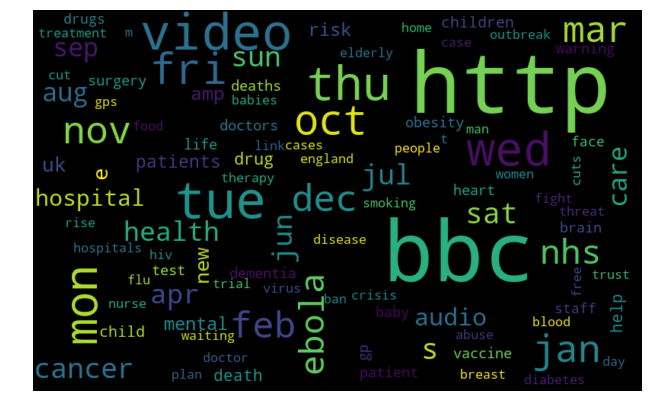

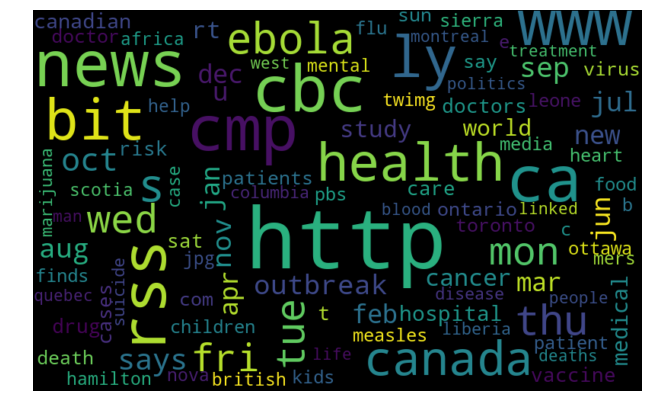

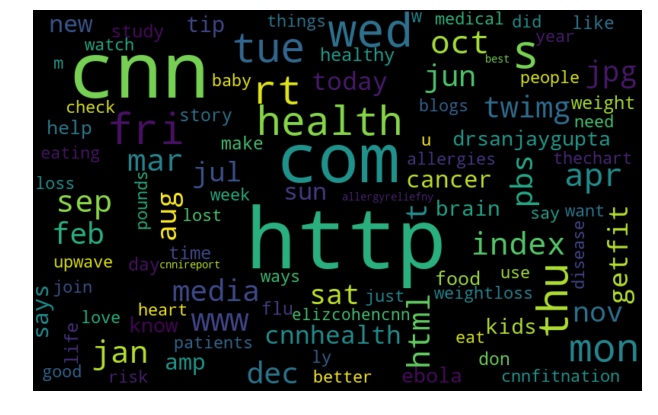

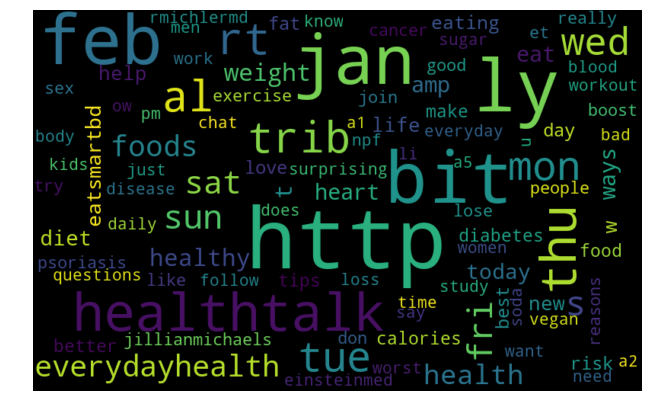

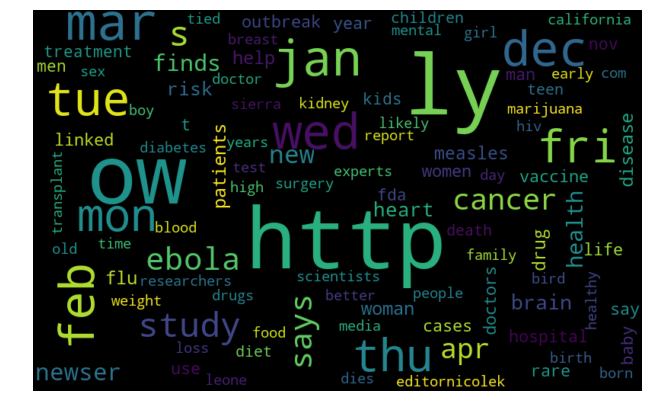

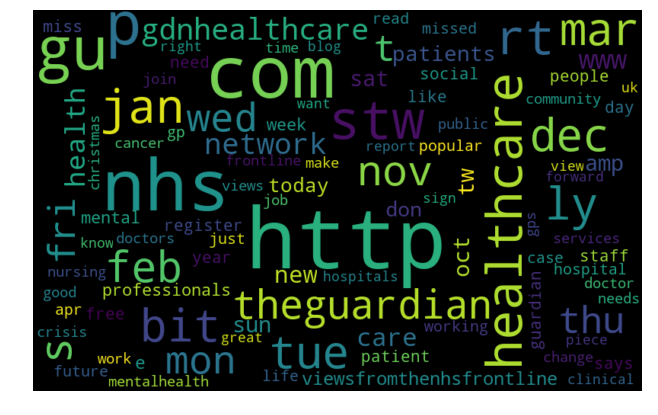

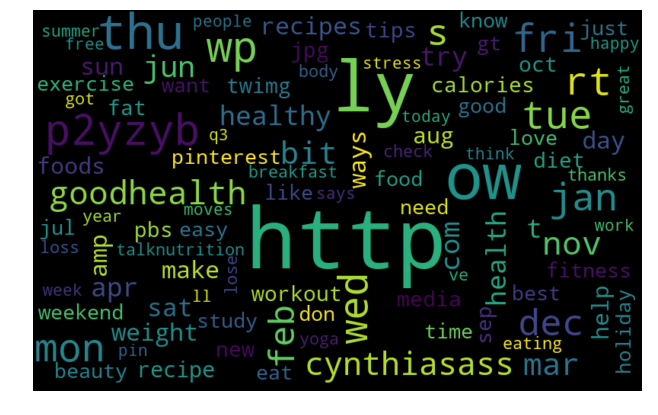

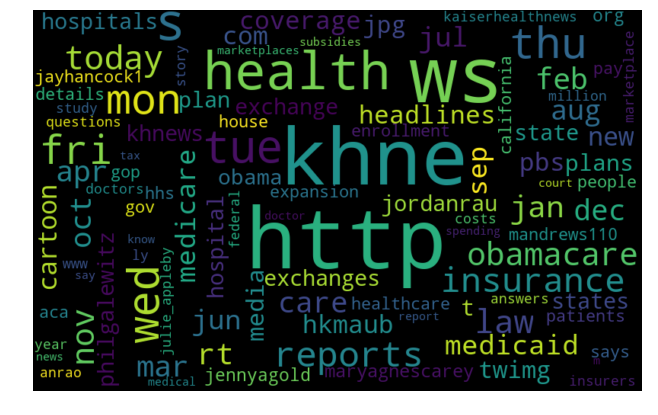

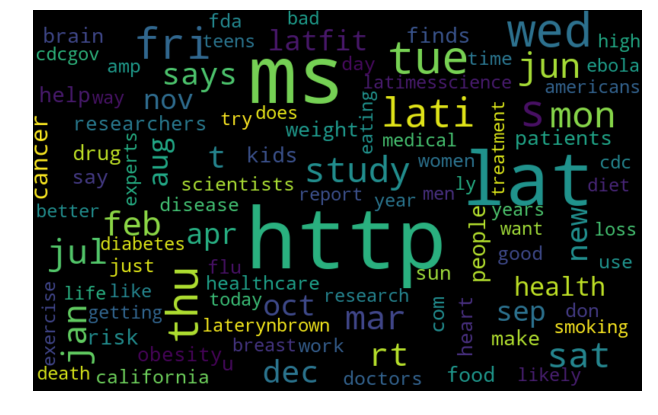

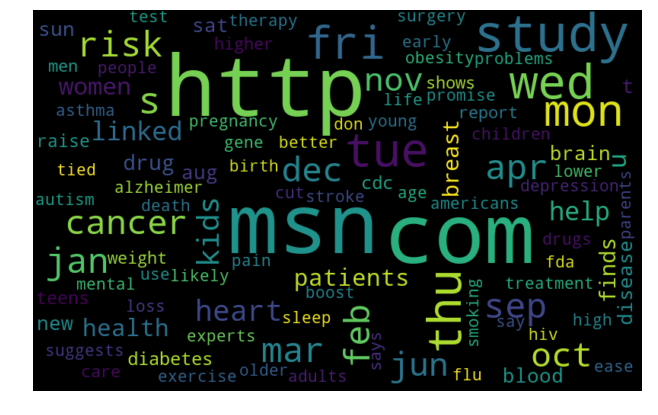

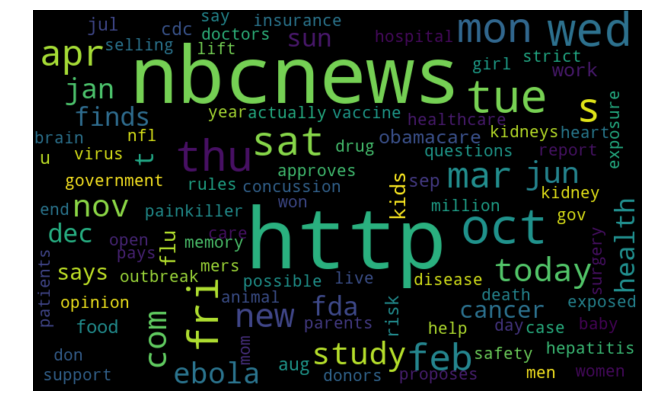

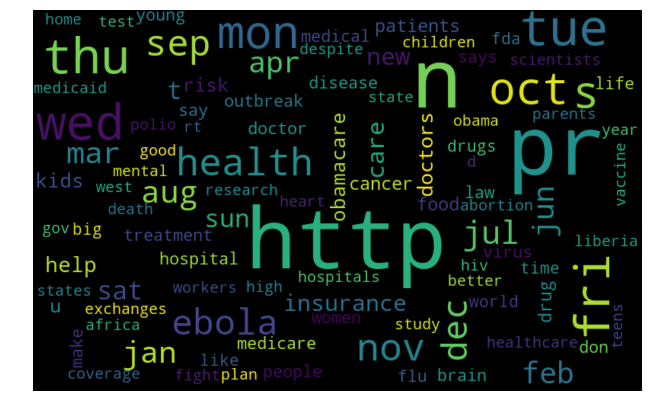

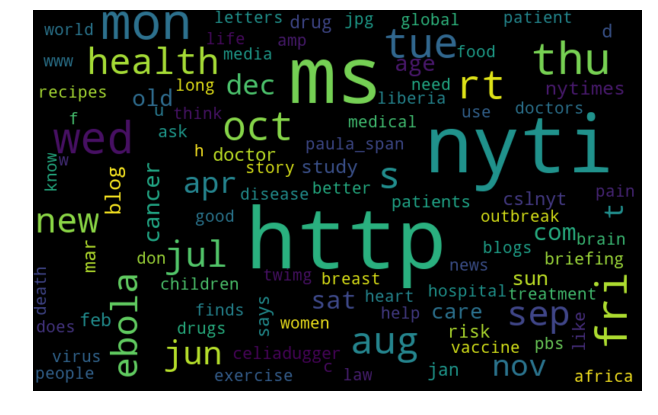

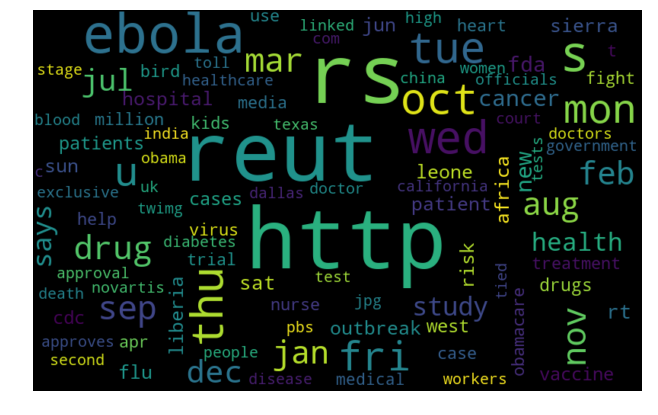

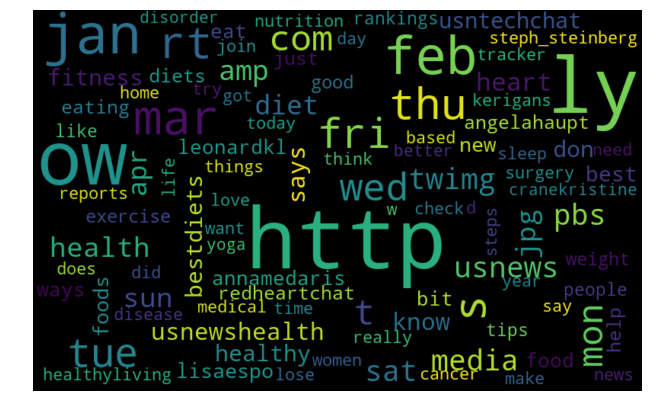

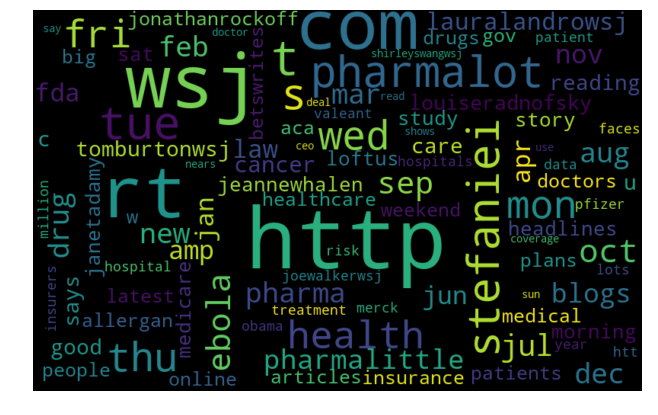

In [6]:
for filepath in iglob(os.path.join(folderpath, '*.txt')):

    fo = open(filepath)
    fo1 = fo.readlines()
    
    ugrms_cnter = Counter()
    bgrms_cnter = Counter()
    
    for line in fo1:
        fil_words = remove_garbage(line)
        
        cleaned_words = remove_words(fil_words.split(), ENGLISH_STOP_WORDS)
        ugrms_cnter.update(cleaned_words)
        
    draw_wordcloud(ugrms_cnter)
